In [2]:
import preprocessing

cleaned_data = preprocessing.data


cleaned_data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,posts,type
0,know intj tool use interact peopl excus antiso...,I
1,rap music ehh opp yeah know valid well know fa...,I
2,prefer p hd low except wew lad video p mind go...,I
3,drink like wish could drink red wine give head...,I
4,space program ah bad deal me freelanc max seem...,I


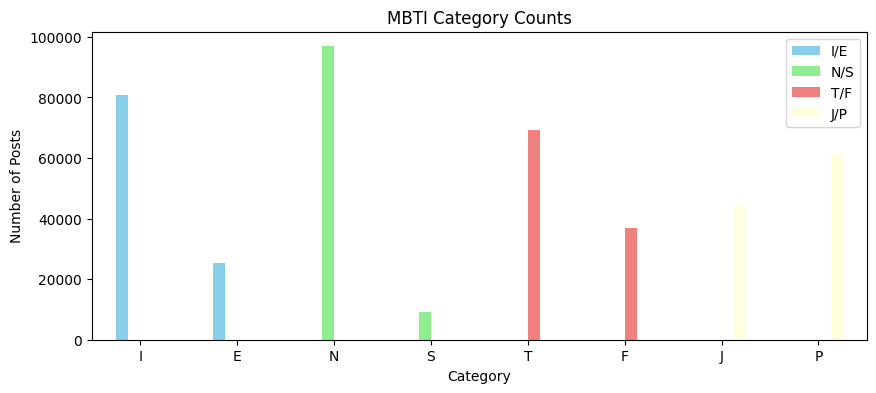

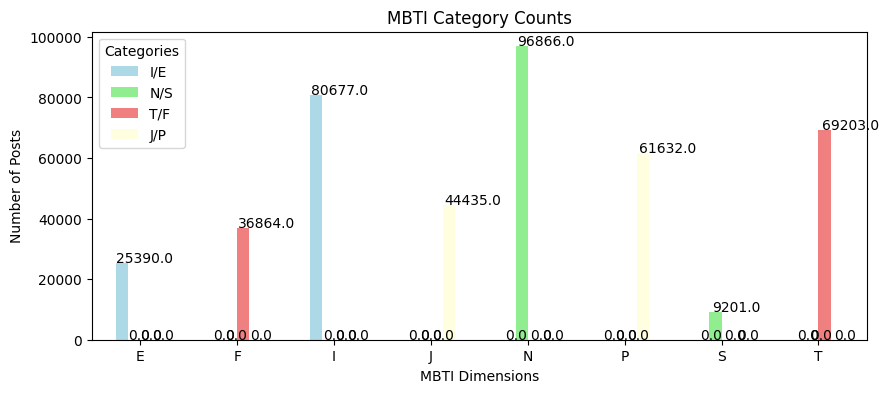

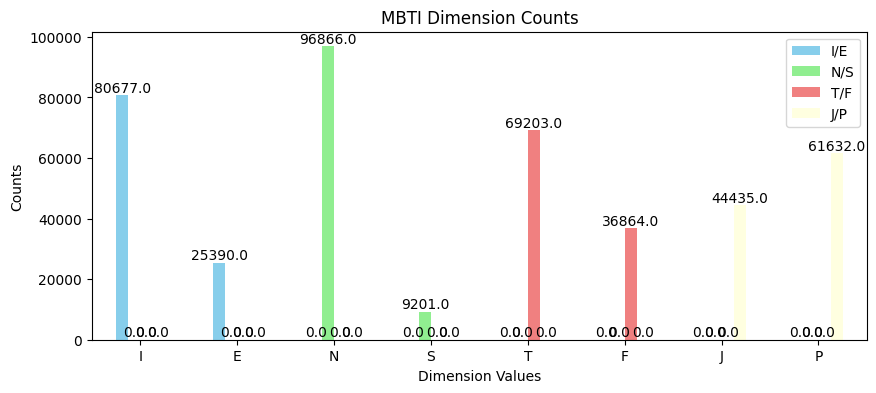

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.dropna(subset=['type'])


categories = ['I/E', 'N/S', 'T/F', 'J/P']
counts = {category: {'I': 0, 'E': 0, 'N': 0, 'S': 0, 'T': 0, 'F': 0, 'J': 0, 'P': 0} for category in categories}

for index, row in df.iterrows():
    mbti_type = row['type']

    if len(mbti_type) == 4:
        counts['I/E'][mbti_type[0]] += 1
        counts['N/S'][mbti_type[1]] += 1
        counts['T/F'][mbti_type[2]] += 1
        counts['J/P'][mbti_type[3]] += 1


df_counts = pd.DataFrame(counts)

df_counts.plot(kind='bar', figsize=(10, 4), color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('MBTI Category Counts')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)  
plt.show()


i_e_count = df['type'].str[0].value_counts().reindex(['I', 'E'])
n_s_count = df['type'].str[1].value_counts().reindex(['N', 'S'])
t_f_count = df['type'].str[2].value_counts().reindex(['T', 'F'])
j_p_count = df['type'].str[3].value_counts().reindex(['J', 'P'])


category_counts = pd.DataFrame({
    'I/E': i_e_count,
    'N/S': n_s_count,
    'T/F': t_f_count,
    'J/P': j_p_count
})


ax = category_counts.plot(kind='bar', figsize=(10, 4), color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('MBTI Category Counts')
plt.xlabel('MBTI Dimensions')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.show()


counts_df = pd.concat([i_e_count, n_s_count, t_f_count, j_p_count], axis=1)
counts_df.columns = ['I/E', 'N/S', 'T/F', 'J/P']


fig, ax = plt.subplots(figsize=(10, 4))
counts_df.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])

plt.title('MBTI Dimension Counts')
plt.xlabel('Dimension Values')
plt.ylabel('Counts')
plt.xticks(rotation=0)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()


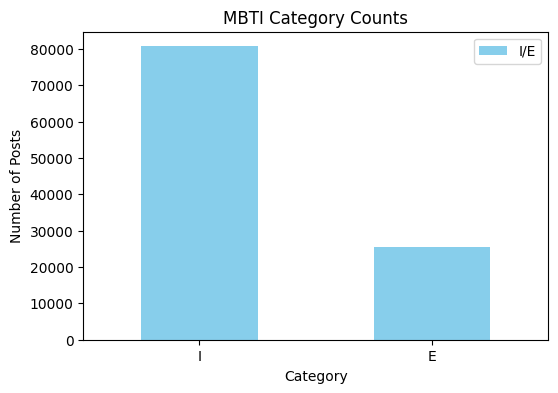

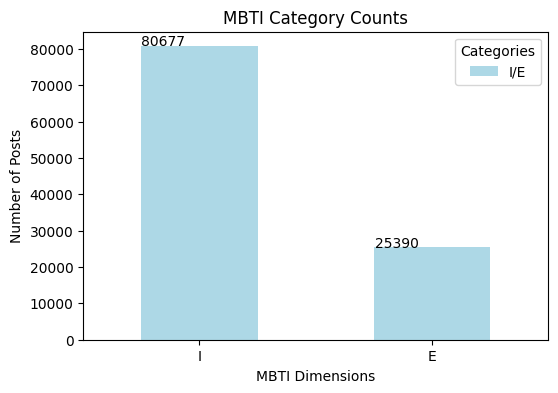

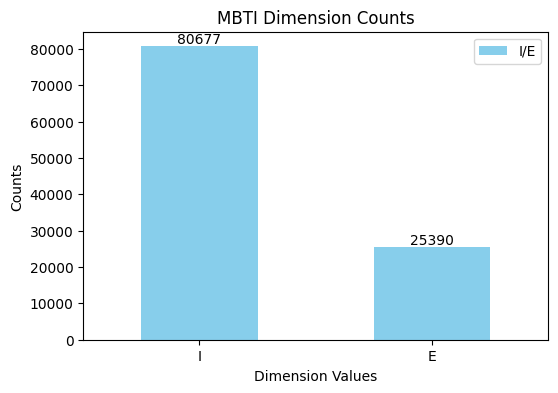

In [52]:
df = df.dropna(subset=['type'])

categories = ['I/E']
counts = {category: {'I': 0, 'E': 0} for category in categories}

for index, row in df.iterrows():
    mbti_type = row['type']
    if len(mbti_type) == 4:
        counts['I/E'][mbti_type[0]] += 1
        
df_counts = pd.DataFrame(counts)


df_counts.plot(kind='bar', figsize=(6, 4), color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('MBTI Category Counts')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)  
plt.show()


i_e_count = df['type'].str[0].value_counts().reindex(['I', 'E'])

category_counts = pd.DataFrame({
    'I/E': i_e_count,
    
})


ax = category_counts.plot(kind='bar', figsize=(6, 4), color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('MBTI Category Counts')
plt.xlabel('MBTI Dimensions')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.show()


counts_df = pd.concat([i_e_count, ], axis=1)
counts_df.columns = ['I/E']


fig, ax = plt.subplots(figsize=(6, 4))
counts_df.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])

plt.title('MBTI Dimension Counts')
plt.xlabel('Dimension Values')
plt.ylabel('Counts')
plt.xticks(rotation=0)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()


Frequency of I: 80677
Frequency of E: 25390


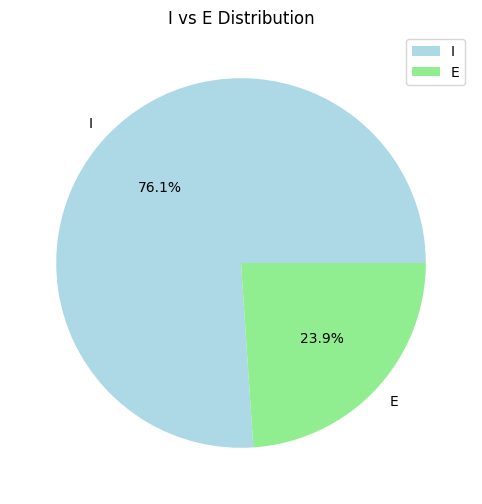

In [4]:
df_filtered = df[df['type'].str[0].isin(['I', 'E'])]
i_e_count = df_filtered['type'].str[0].value_counts().reindex(['I', 'E'])

print(f"Frequency of I: {i_e_count.get('I', 0)}")
print(f"Frequency of E: {i_e_count.get('E', 0)}")

#Draw a frequency pie chart for I and E
fig, ax = plt.subplots(figsize=(8, 6))
i_e_count.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], legend=True)
plt.title('I vs E Distribution')
plt.ylabel('')  
plt.show()


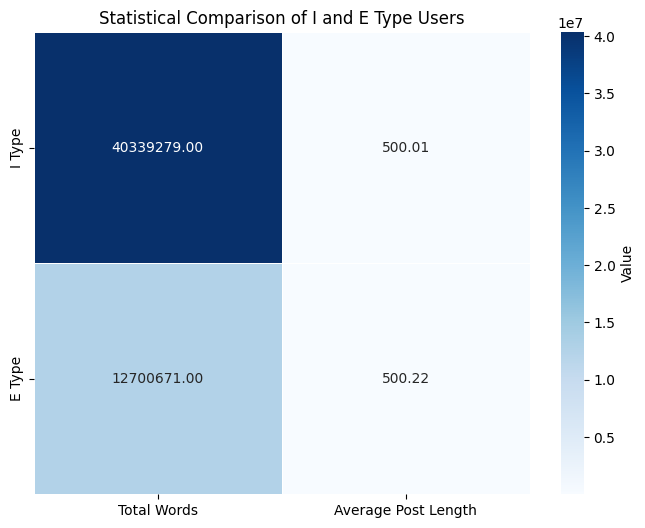

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

df = cleaned_data.copy()

i_df = df[df['type'].str.startswith('I')]
e_df = df[df['type'].str.startswith('E')]

def get_word_frequencies(df):
    word_list = ' '.join(df['posts']).split() 
    word_list = [word.lower() for word in word_list] 
    return dict(Counter(word_list))

i_word_freq = get_word_frequencies(i_df)
e_word_freq = get_word_frequencies(e_df)


i_total_words = sum(i_word_freq.values())
e_total_words = sum(e_word_freq.values())
i_avg_length = i_df['posts'].apply(lambda x: len(x.split())).mean()
e_avg_length = e_df['posts'].apply(lambda x: len(x.split())).mean()


heatmap_data = pd.DataFrame({
    'Total Words': [i_total_words, e_total_words],
    'Average Post Length': [i_avg_length, e_avg_length]
}, index=['I Type', 'E Type'])


plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Value'}, linewidths=0.5)


plt.title('Statistical Comparison of I and E Type Users')


plt.show()


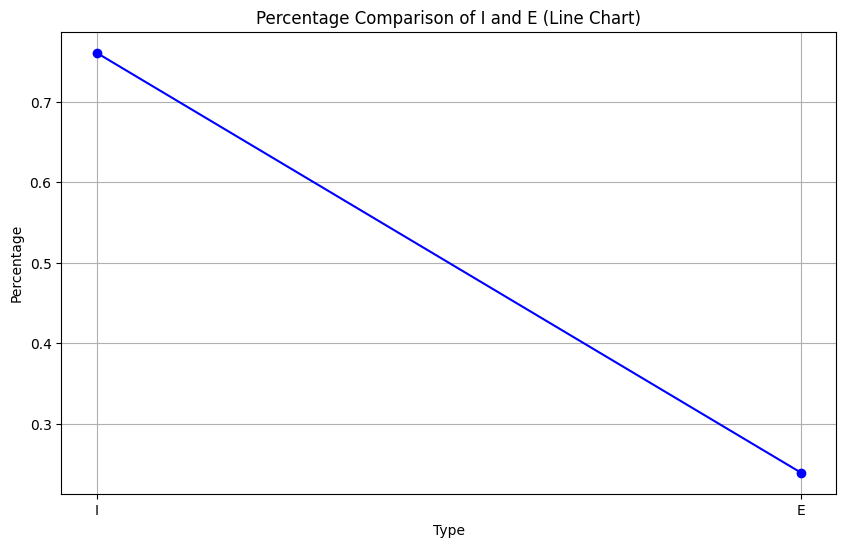

In [ ]:
# Draw a line chart
plt.figure(figsize=(10, 6))
plt.plot(i_e_count_normalized.index, i_e_count_normalized.values, marker='o', linestyle='-', color='b')

plt.title('Percentage Comparison of I and E (Line Chart)')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

df = cleaned_data.copy()
i_df = df[df['type'].str.startswith('I')]
e_df = df[df['type'].str.startswith('E')]


def get_word_frequencies(df):
    word_list = ' '.join(df['posts']).split() 
    word_list = [word.lower() for word in word_list]  
    return dict(Counter(word_list))

i_word_frequencies = get_word_frequencies(i_df)
e_word_frequencies = get_word_frequencies(e_df)


i_most_common = Counter(i_word_frequencies).most_common(20)
e_most_common = Counter(e_word_frequencies).most_common(20)

i_df_freq = pd.DataFrame(i_most_common, columns=['Word', 'Frequency'])
e_df_freq = pd.DataFrame(e_most_common, columns=['Word', 'Frequency'])

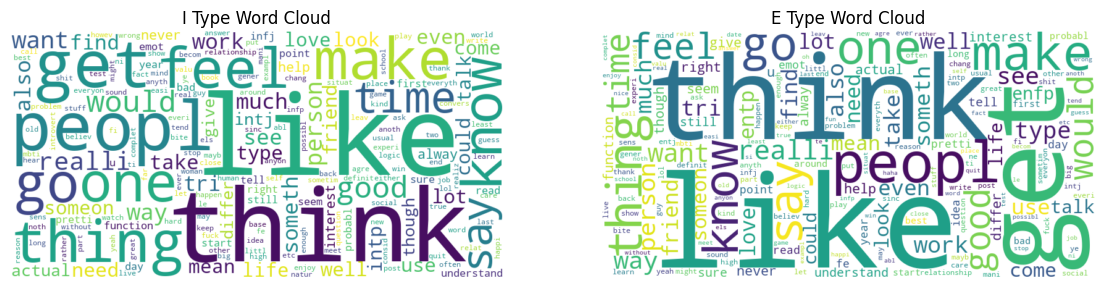

In [60]:
def get_word_frequencies(df):
    word_list = ' '.join(df['posts']).split()  
    word_list = [word.lower() for word in word_list]  
    return dict(Counter(word_list))

i_word_frequencies = get_word_frequencies(i_df)
e_word_frequencies = get_word_frequencies(e_df)

# I 
i_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(i_word_frequencies)

# E 
e_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(e_word_frequencies)

plt.figure(figsize=(14, 7))

# Type I Word Cloud Map
plt.subplot(1, 2, 1)
plt.imshow(i_wordcloud, interpolation='bilinear')
plt.title('I Type Word Cloud')
plt.axis('off')

# E-type word cloud map
plt.subplot(1, 2, 2)
plt.imshow(e_wordcloud, interpolation='bilinear')
plt.title('E Type Word Cloud')
plt.axis('off')

plt.show()


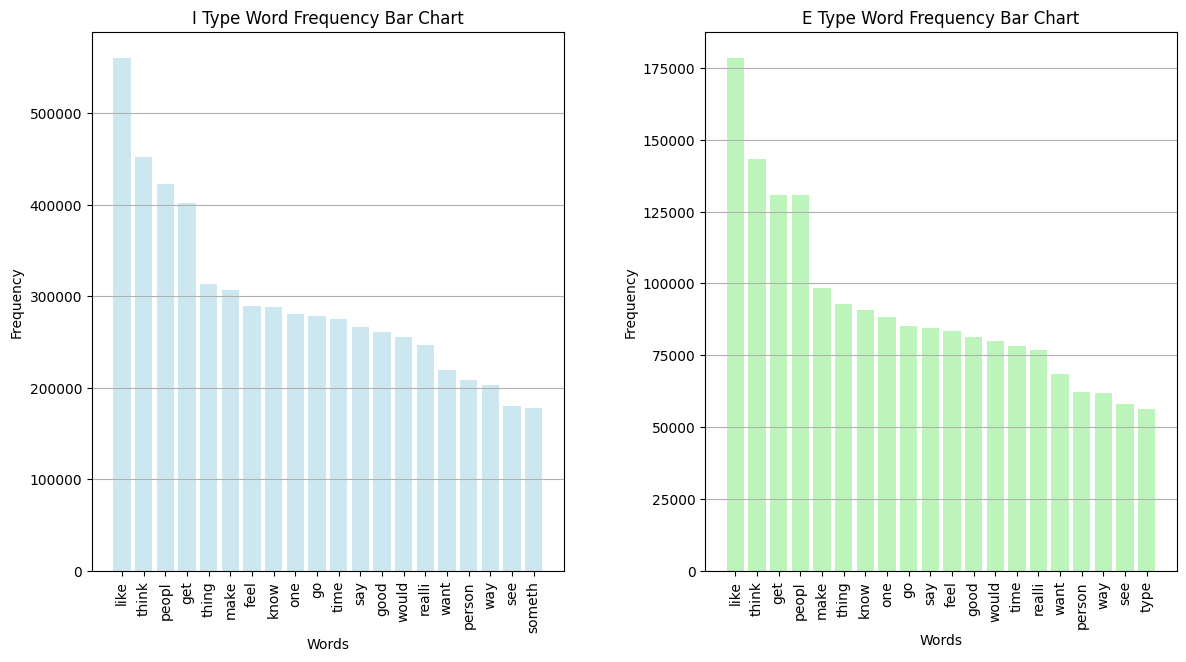

In [ ]:
i_most_common = Counter(i_word_frequencies).most_common(20)
e_most_common = Counter(e_word_frequencies).most_common(20)

i_df_freq = pd.DataFrame(i_most_common, columns=['Word', 'Frequency'])
e_df_freq = pd.DataFrame(e_most_common, columns=['Word', 'Frequency'])

plt.figure(figsize=(14, 7))

# Type I Vocabulary Frequency Bar Chart
plt.subplot(1, 2, 1)
plt.bar(i_df_freq['Word'], i_df_freq['Frequency'], color='lightblue', alpha=0.6)
plt.title('I Type Word Frequency Bar Chart')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.grid(True, axis='y')

# E-type vocabulary frequency bar chart
plt.subplot(1, 2, 2)
plt.bar(e_df_freq['Word'], e_df_freq['Frequency'], color='lightgreen', alpha=0.6)
plt.title('E Type Word Frequency Bar Chart')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.grid(True, axis='y')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


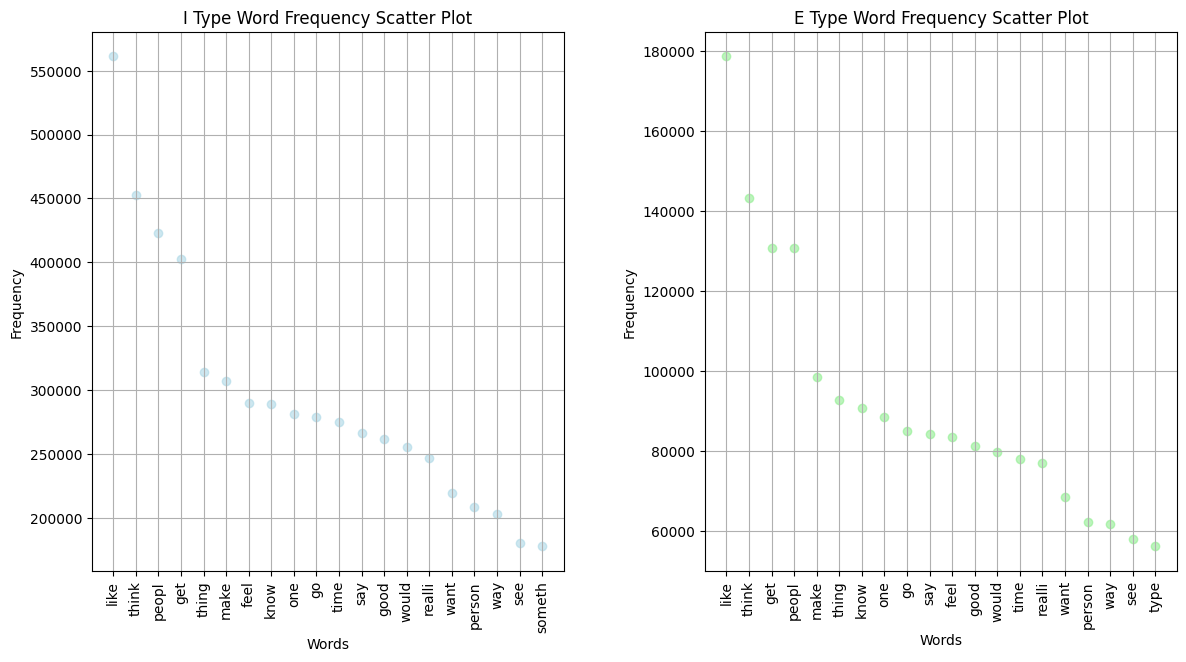

In [ ]:
# scatter plot
plt.figure(figsize=(14, 7))

# I type vocabulary frequency scatter plot
plt.subplot(1, 2, 1)
plt.scatter(i_df_freq['Word'], i_df_freq['Frequency'], color='lightblue', alpha=0.6)
plt.title('I Type Word Frequency Scatter Plot')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.grid(True)

# E-type vocabulary frequency scatter plot
plt.subplot(1, 2, 2)
plt.scatter(e_df_freq['Word'], e_df_freq['Frequency'], color='lightgreen', alpha=0.6)
plt.title('E Type Word Frequency Scatter Plot')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


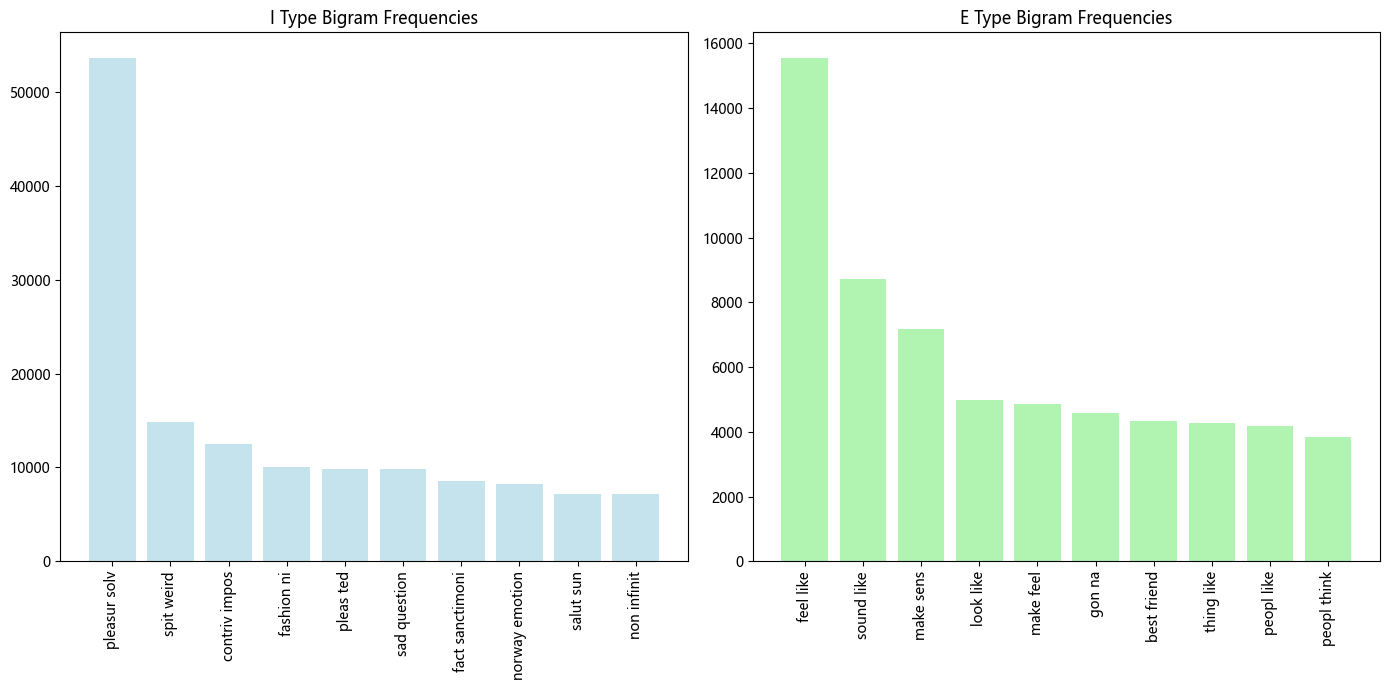

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Using Bigram Analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
i_bigrams = vectorizer.fit_transform(i_df['posts'])
e_bigrams = vectorizer.fit_transform(e_df['posts'])

i_bigram_frequencies = dict(zip(vectorizer.get_feature_names_out(), i_bigrams.sum(axis=0).A1))
e_bigram_frequencies = dict(zip(vectorizer.get_feature_names_out(), e_bigrams.sum(axis=0).A1))

i_most_common_bigrams = Counter(i_bigram_frequencies).most_common(10)
e_most_common_bigrams = Counter(e_bigram_frequencies).most_common(10)

i_bigram_df = pd.DataFrame(i_most_common_bigrams, columns=['Bigram', 'Frequency'])
e_bigram_df = pd.DataFrame(e_most_common_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(i_bigram_df['Bigram'], i_bigram_df['Frequency'], color='lightblue', alpha=0.7)
plt.xticks(rotation=90)
plt.title('I Type Bigram Frequencies')

plt.subplot(1, 2, 2)
plt.bar(e_bigram_df['Bigram'], e_bigram_df['Frequency'], color='lightgreen', alpha=0.7)
plt.xticks(rotation=90)
plt.title('E Type Bigram Frequencies')

plt.tight_layout()
plt.show()


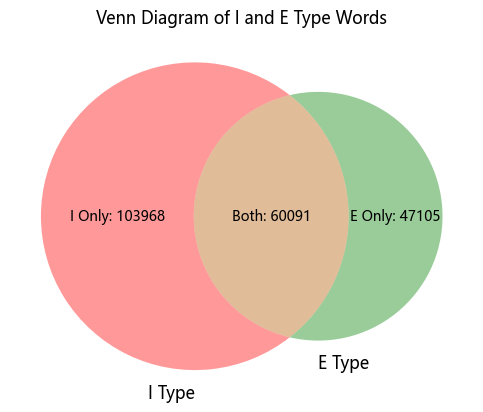

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Retrieve vocabulary sets of type I and type E
i_words_set = set(i_word_frequencies.keys())
e_words_set = set(e_word_frequencies.keys())

venn = venn2([i_words_set, e_words_set], set_labels=('I Type', 'E Type'))

venn_values = venn.get_label_by_id('10').get_text(), venn.get_label_by_id('01').get_text(), venn.get_label_by_id('11').get_text()

venn.get_label_by_id('10').set_text(f'I Only: {venn_values[0]}')
venn.get_label_by_id('01').set_text(f'E Only: {venn_values[1]}')
venn.get_label_by_id('11').set_text(f'Both: {venn_values[2]}')

plt.title('Venn Diagram of I and E Type Words')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

download('punkt')
download('stopwords')
download('vader_lexicon')

df = cleaned_data.copy()

df['posts_length'] = df['posts'].apply(lambda x: len(x.split())) 


i_df = df[df['type'].str.startswith('I')]
e_df = df[df['type'].str.startswith('E')]

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text.lower())  
    filtered_words = [word for word in words if word not in stop_words and word not in string.punctuation]
    return ' '.join(filtered_words)

df['filtered_posts'] = df['posts'].apply(remove_stopwords)
i_df['filtered_posts'] = i_df['posts'].apply(remove_stopwords)
e_df['filtered_posts'] = e_df['posts'].apply(remove_stopwords)

# Initiate VADER sentiment analysis tool
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment score of the text and extract high-frequency sentiment words
def get_emotion_frequencies(df):
    word_list = ' '.join(df['filtered_posts']).split()
    word_list = [word for word in word_list if word not in string.punctuation] 
    word_frequencies = Counter(word_list)
    
    emotion_words = []
    for word in word_frequencies:
        sentiment_score = sia.polarity_scores(word) 
        if sentiment_score['compound'] != 0:
            emotion_words.append(word)
    
    return dict(Counter(emotion_words))

i_word_frequencies = get_emotion_frequencies(i_df)
e_word_frequencies = get_emotion_frequencies(e_df)

i_top_words = sorted(i_word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]
e_top_words = sorted(e_word_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27712\1456932966.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['filtered_posts'] = i_df['posts'].apply(remove_stopwords)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27712\1456932966.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [ ]:
# Type I user statistical data output
print("===== I Type Statistics =====")
print(f"Average Post Length: {i_df['posts_length'].mean():.2f}")
print(f"Median Post Length: {i_df['posts_length'].median()}")
print(f"Standard Deviation of Post Length: {i_df['posts_length'].std():.2f}")
print(f"Variance of Post Length: {i_df['posts_length'].var():.2f}")
print("\nTop 10 Emotional Words for I Type Users:")
print(pd.DataFrame(i_top_words, columns=['Word', 'Frequency']))

===== I Type Statistics =====
Average Post Length: 500.01
Median Post Length: 500.0
Standard Deviation of Post Length: 1.32
Variance of Post Length: 1.74

Top 10 Emotional Words for I Type Users:
        Word  Frequency
0  enlighten          1
1     matter          1
2       best          1
3     friend          1
4       want          1
5   argument          1
6       like          1
7      defer          1
8     number          1
9        low          1


In [ ]:
# E-type user statistical data output
print("\n===== E Type Statistics =====")
print(f"Average Post Length: {e_df['posts_length'].mean():.2f}")
print(f"Median Post Length: {e_df['posts_length'].median()}")
print(f"Standard Deviation of Post Length: {e_df['posts_length'].std():.2f}")
print(f"Variance of Post Length: {e_df['posts_length'].var():.2f}")
print("\nTop 10 Emotional Words for E Type Users:")
print(pd.DataFrame(e_top_words, columns=['Word', 'Frequency']))


===== E Type Statistics =====
Average Post Length: 500.22
Median Post Length: 500.0
Standard Deviation of Post Length: 2.22
Variance of Post Length: 4.92

Top 10 Emotional Words for E Type Users:
      Word  Frequency
0     yeah          1
1     like          1
2   number          1
3     well          1
4     safe          1
5   matter          1
6     want          1
7    thank          1
8  sarcasm          1
9   burden          1


In [ ]:
# Calculate the unique emotional vocabulary and shared emotional vocabulary of type I and E users
i_emotion_set = set(i_word_frequencies.keys())
e_emotion_set = set(e_word_frequencies.keys())

i_unique = len(i_emotion_set - e_emotion_set)
e_unique = len(e_emotion_set - i_emotion_set)
common_emotion_words = len(i_emotion_set & e_emotion_set)

#Comparison output of I and E type emotional vocabulary
print("\n===== Emotional Vocabulary Comparison =====")
print(pd.DataFrame({'Set': ['I Only', 'E Only', 'Common Emotional Words'],
                    'Word Count': [i_unique, e_unique, common_emotion_words]}))


===== Emotional Vocabulary Comparison =====
                      Set  Word Count
0                  I Only         169
1                  E Only          80
2  Common Emotional Words        1190
